# maysics.models模块说明

models模块有五个函数

|名称|作用|
|---|---|
|linear_r|线性回归模型|
|logistic|逻辑斯特人口增长模型|
|pagerank|网页排序算法|
|pso|粒子群优化算法|
|simple_gd|简易梯度下降算法|

models模块有八个类

|名称|作用|
|---|---|
|AR|自回归模型|
|ED|传染病模型|
|GM|灰色系统GM(1,1)|
|Leslie|莱斯利模型|
|MC|蒙特卡洛模拟|
|GA|遗传算法|
|SA|模拟退火算法|
|GD|梯度下降算法|

<br></br>
## 线性回归模型：linear_r
linear_r(x, y)
<br>```x```：一维或二维ndarray，自变量
<br>```y```：一维或二维ndarray，因变量

### 功能说明
利用最小二乘法进行线性回归
<br>x和y是用于回归的数据集，可以是一维或者二维数组
<br>函数返回一个元组，(系数矩阵, 均方误差mse)
<br>可以直接从maysics中调用

### DEMO 1-1：线性回归数据集并绘图

均方误差：1.552582977594145


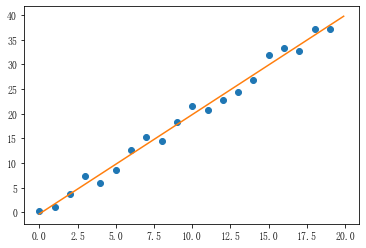

In [1]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(100)
x = np.arange(0, 20, 1)
y = 2 * x + 4 * np.random.rand(*x.shape) - 2    # 增加(-2, 2)的误差项

coef, mse = ms.models.linear_r(x, y)
print('均方误差：{}'.format(mse))

x_new = np.arange(0, 20, 0.1)
y_pre = coef[0] * x_new + coef[1]

plt.plot(x, y, 'o')
plt.plot(x_new, y_pre)

<br></br>
## 逻辑斯蒂人口增长模型：logistic
logistic(t, N0, r, K)
<br>t：时间
<br>N0：数或数组，现有人口数
<br>r：数类型，人口自然增长率
<br>K：数类型，环境资源允许的稳定人口数

### 原理
$$N_{t}=\frac{KN_{0}}{N_{0}+(K-N_{0})e^{-rt}}$$
<br>其中，$N_{t}$为$t$时刻的人口数， $N_{0}$为现有人口数，$r$为人口自然增长率，$K$为环境资源允许的稳定人口数

### DEMO 2-1： $N_{0}=100$，$r=8$%，$K=10^{6}$，绘制人口数随时间$t$的变化曲线

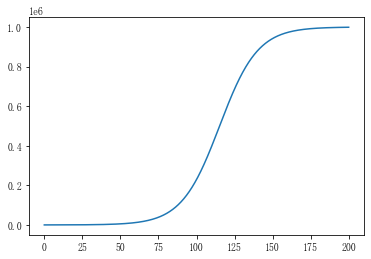

In [2]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

t = np.arange(0, 200, 0.1)
Nt = ms.models.logistic(t, 100, 0.08, 1e6)

plt.plot(t, Nt)

<br></br>
## 网页排序算法：pagerank
pagerank(data, loop=5, pr=None, d=0.85, l=False)
<br>```data```：列表形式，每个连接所指向的链接或L矩阵，L矩阵即L(i, j)表示：如果j链接指向i链接，则L(i, j)为j链接指向的所有链接数；否则为0
<br>```loop```：整型，迭代次数，默认为5
<br>```pr```：一维数组形式，初始的pagerank值，默认pagerank值全部相等
<br>```d```：数类型，系数
<br>```l```：布尔类型，True表示data是L矩阵

### 功能说明
用于网页重要性排序

### DEMO 3-1：计算如下链接指向图的各个链接的相对重要性

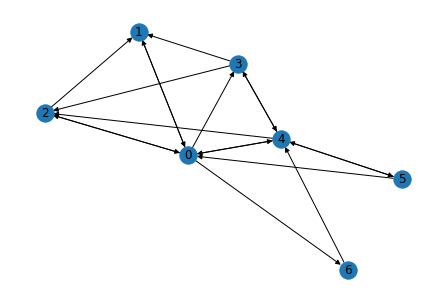

In [1]:
# 这里采用networkx包来对网络图进行绘制
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6])
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 6),
                  (1, 0),
                  (2, 0), (2, 1),
                  (3, 1), (3, 2), (3, 4),
                  (4, 0), (4, 2), (4, 3), (4, 5),
                  (5, 0), (5, 4),
                  (6, 4)])
nx.draw(G, with_labels=True)
plt.show()

In [2]:
import maysics as ms

data = [[1, 2, 3, 4, 6],
        [0],
        [0, 1],
        [1, 2, 4],
        [0, 2, 3, 5],
        [0, 4],
        [4]]

ms.algo.pagerank(data, loop=10)

array([0.28032189, 0.15872033, 0.13889698, 0.10826608, 0.18410007,
       0.06060696, 0.06908769])

<br></br>
## 粒子群优化算法：pso
pso(select, initial, num=10, loop=10, omega=1, phi_1=2, phi_2=2, v_max=None, param={}, random_state=None, batch=True)
<br>```select```：函数类型，粒子的评估函数，需返回每个粒子的评估值，默认函数最小值为最优
<br>```initial```：1维或2维数组，初始粒子位置 
<br>```num```：整型，模拟粒子个数
<br>```loop```整型，迭代次数
<br>```omega```：数或函数，惯性权重因子，若为函数，其输入须为迭代次数
<br>```phi_1```：数类型，第一个加速度常数
<br>```phi_2```：数类型，第二个加速度常数
<br>```v_max```：数类型，粒子最大速度
<br>```param```：字典类型，当select函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典
<br>```random_state```：整型，随机种子
<br>```batch```：布尔类型，True表示评估函数为批量输入函数，False表示评估函数为非批量输入函数

### 原理
<b>第i个粒子的第k+1步迭代公式：</b>
$$v_{k+1}=\omega_{k}v_{k}+\phi_{1}rand(0,1)(p_{i,k}-x_{i,k})+\phi_{2}rand(0,1)(p_{g,k}-x_{i,k})$$
$$x_{k+1}=x_{k}+v_{k+1}$$
其中，$p_{i,k}$是第i个粒子k步扩散以来最优的位置
<br>$p_{g,k}$是所有粒子k步扩散以来最优的位置
<br>$\omega_{k}$是惯性权重因子
<br>$\phi_{i}$是第i个加速度常数
<br>$rand$是随机函数

### DEMO 4-1：求非批量输入函数$f(x,y,z)=x^{2}+y^{2}+z^{2}$的最小值

In [3]:
import maysics as ms

def f(x):
    return sum(x**2)

#设置粒子初始位置为(5, 10, 10)
ms.algo.pso(f, [5, 10, 10], num=5, loop=300, v_max=10, random_state=100, batch=False)

array([ 3.79862362,  0.74240201, -2.43763427])

### DEMO 4-2：求批量输入函数$f(x,y,z)=x^{2}+y^{2}+z^{2}$的最小值

In [4]:
import maysics as ms

def f(x):
    x = x**2
    return x.sum(axis=1)

#设置粒子初始位置为(5, 10, 10)
ms.algo.pso(f, [5, 10, 10], num=5, loop=300, v_max=10, random_state=100)

array([ 3.79862362,  0.74240201, -2.43763427])

<br></br>
## 简易梯度下降算法：simple_gd
simple_gd(select, initial, ytol, acc, step=-7.0, auto=True, param={})
<br>```select```：函数类型，评估函数
<br>```initial```：数或数组，初始解，select函数的输入值
<br>```ytol```：浮点数类型，当函数值变化率小于ytol时停止迭代
<br>```acc```：浮点数类型，求导的精度
<br>```step```：浮点数类型，可选，步长倍率，每次生成的步长为step * 负梯度，若auto=True，则步长为x*10^step，其中x为梯度的第一位有效数字
<br>```auto```：布尔类型，True使用自适应步长
<br>```param```：字典类型，可选，当select有其他非默认参数时，需输入以参数名为键，参数值为值的字典

### 功能说明
用法与GD类几乎相同，但是函数只返回最优解
<br>注意：默认最小值点为最优点

<br></br>
## 自回归模型：AR
AR()

### AR的方法
AR类有两个方法，可以直接调用：```fit```、```predict```
<br>fit(data, p=1)
<br>```data```：数组，需要回归的数据
<br>```p```：整型，选择进行回归分析的历史项数，默认为1

predict(t, sigma=None, recount=False, mean=False, random_state=None, method='norm', param={})
<br>```t```：数或数组类型，预测的时间
<br>```sigma```：数类型，随机变量的方差，默认与误差方差相同
<br>```recount```：布尔类型，True代表预测时间以原数据的最后一个时间点为-1重新计算，默认为Fasle
<br>```mean```：布尔类型，True代表以预测均值输出，默认为False
<br>```random_state```：整型，随机种子
<br>```method```：字符串类型或函数类型，字符串可选'norm'和'uniform'，分别代表正态分布和均匀分布，默认为'norm'
<br>```param```：字典类型，当method为函数且有其他非默认参数时，需输入以参数名为键，参数值为值的字典，默认为空字典

回归系数可以通过coef属性获取；原数据与预测数据之间的误差方差可以通过sigma属性获取

### 原理
$$
X(t) = 
\left( \begin{array}{cc} \Phi_{t-1} & \Phi_{t-1} & \cdots & \Phi_{t-p} \end{array} \right)
\cdot
\left( \begin{array}{cc} X(t-1)\\
X(t-2)\\
\vdots\\
X(t-p) \end{array} \right) + c + \epsilon t
$$
其中，$\Phi_{t-p}$是系数，$c$是常数，$\epsilon t$是随机变量

### DEMO 5-1：用p=1的自回归模型预测序列（0,1,2,3,4,5,6,7,8,9）后3项

In [5]:
from maysics.models import AR
import numpy as np

data = np.arange(0, 10, 1)
AR().fit(data)
AR().predict([10, 11, 12], mean=True)

array([10., 11., 12.])

### DEMO 5-2：用p=1的自回归模型预测序列（0,1,2,3,4,5,6,7,8,9）后3项，并使用recount参数

In [6]:
from maysics.models import AR
import numpy as np

data = np.arange(0, 10, 1)
AR().fit(data)
AR().predict([0, 1, 2], recount=True, mean=True)

array([10., 11., 12.])

### DEMO 5-3：用coef属性和sigma属性查看回归系数和原数据预测误差方差

In [7]:
from maysics.models import AR
import numpy as np

data = np.arange(0, 10, 1)
AR().fit(data)
print('系数：{}\n方差：{}'.format(AR().coef, AR().sigma))

系数：[1. 1.]
方差：9.332919779905611e-16


<br></br>
## 传染病模型：ED
ED(I0, K, beta, R=0, E=0)
<br>```I0```：数类型，初始感染者
<br>```K```：数类型，样本总数
<br>```beta```：数类型，感染率
<br>```R```：数类型，初始康复者(带有免疫力)或死者
<br>```E```：数类型，暴露者，染病但还不具有传染能力

### ED的方法
ED类有四个方法：```SI```、```SIR```、```SIRS```、```SEIR```
<br>分别可以实现四种传染病模型：SI、SIR、SIRS、SEIR
<br>SI(t)
<br>```t```：数或一维数组，需要预测的时间

SIR(gamma, t_span, method='RK45', t_eval=None)
<br>```gamma```：数类型，康复率
<br>```t_span```：元组类型，预测时间范围
<br>```method```：字符串类型，微分方程求解方法，可选择'RK45'、'RK23'、'DOP835'、'Radau'、'BDF'、'LSODA'
<br>```t_eval```：数组类型，每当t等于该数组中的值时，会生成一个数值解

SIRS(gamma, alpha, t_span, method='RK45', t_eval=None)
<br>```gamma```：数类型，康复率
<br>```alpha```：数类型，用于衡量康复者获得免疫的时间
<br>```t_span```：元组类型，求解的上下限
<br>```method```：字符串类型，求解方法，可选择'RK45'、'RK23'、'DOP835'、'Radau'、'BDF'、'LSODA'
<br>```t_eval```：数组类型，每当t等于该数组中的值时，会生成一个数值解

SEIR(gamma1, gamma2, alpha, t_span, method='RK45', t_eval=None)
<br>```gamma1```：数类型，潜伏期康复率
<br>```gamma2```：数类型，患者康复率
<br>```alpha```：数类型，用于衡量康复者获得免疫的时间
<br>```t_span```：元组类型，求解的上下限
<br>```method```：字符串类型，求解方法，可选择'RK45'、'RK23'、'DOP835'、'Radau'、'BDF'、'LSODA'
<br>```t_eval```：数组类型，每当t等于该数组中的值时，会生成一个数值解

### 原理
#### SI模型
SI模型有解析解：
<br>$I=K\frac{1-(K-I_{0})}{K+I_{0}+I_{0} e^{\beta Kt}}$
<br>$S=K-I$

#### SIR模型
SIR模型满足如下微分方程：
<br>$\frac{dS}{dt}=-\beta IS$
<br>$\frac{dI}{dt}=\beta IS-\gamma I$
<br>$\frac{dR}{dt}=\gamma I$

#### SIRS模型
SIRS模型满足如下微分方程：
<br>$\frac{dS}{dt}=-\beta IS+\alpha R$
<br>$\frac{dI}{dt}=\beta IS-\gamma I$
<br>$\frac{dR}{dt}=\gamma I-\alpha R$

#### SEIR模型
SEIR模型满足如下微分方程：
<br>$\frac{dS}{dt}=-\beta IS$
<br>$\frac{dE}{dt}=\beta IS-(\alpha+\gamma_{1})E$
<br>$\frac{dI}{dt}=\alpha E-\gamma_{2} I$
<br>$\frac{dR}{dt}=\gamma_{1}E+\gamma_{2}I$

### DEMO 6-1：利用SI模型预测病情并绘图，$I_{0}$为10，$K$为十万，$\beta$为0.1‰

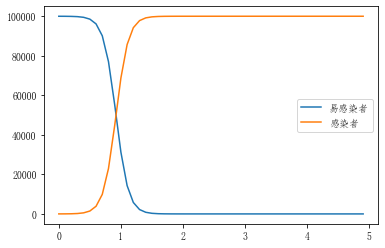

In [8]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.1)

ed = ED(10, 1e5, 1e-4)
s, i = ed.SI(t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.legend()

### DEMO 6-2：利用SIR模型预测病情并绘图，$I_{0}=10$，$K=10^{5}$，$\beta=0.05$‰，$\gamma=0.1$

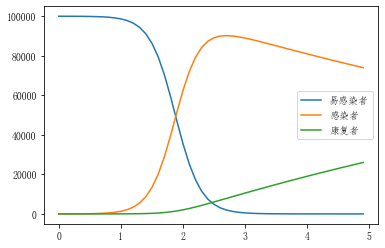

In [9]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.1)

ed = ED(10, 1e5, 5e-5)
s, i, r = ed.SIR(0.1, (0, 5), t_eval=t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.plot(t, r, label='康复者')
plt.legend()

### DEMO 6-3：利用SIRS模型预测病情并绘图，$I_{0}=10$，$K=10^{5}$，$\beta=0.05$‰，$\gamma=0.1$，$\alpha=1$

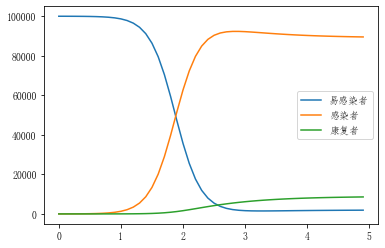

In [10]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.1)

ed = ED(10, 1e5, 5e-5)
s, i, r = ed.SIRS(0.1, 1, (0, 5), t_eval=t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.plot(t, r, label='康复者')
plt.legend()

### DEMO 6-4：利用SEIR模型预测病情并绘图，$I_{0}=10$，$K=10^{5}$，$\beta=0.05$‰，$\gamma_{1}=0.3$，$\gamma_{2}=0.1$，$\alpha=1$

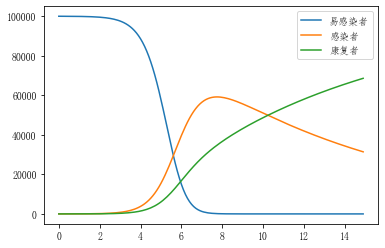

In [11]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 15, 0.1)

ed = ED(10, 1e5, 5e-5)
s, e, i, r = ed.SEIR(0.3, 0.1, 1, (0, 15), t_eval=t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.plot(t, r, label='康复者')
plt.legend()

<br></br>
## 灰色系统模型GM(1, 1)：GM
GM()

### GM的方法
下设可调用方法```fit```
<br>fit(y, acc=1)
<br>y：一维数组
<br>acc：数类型，可选，调整级比的精度

### 调整级比时的精度
在调整级比时，模型会将数列循环平移acc个单位，直到$\lambda(k)$∈$(e^{-2/(n+1)}, e^{2/(n+2)})$
<br>其中，$\lambda(k)=\frac{x(0)(k-1)}{x(0)(k)}$，$k = 2, 3, ..., n$
<br>最后平移的长度可以通过调用C属性获取
### DEMO 7-1：acc参数调用和C属性获取

In [12]:
from maysics.models import GM

year = [-3, 2, 4, 8, 11]

GM.fit(year)
print('acc=1：{}'.format(GM.C))

GM.fit(year, acc=0.1)
print('acc=0.1：{}'.format(GM.C))

acc=1：16
acc=0.1：15.69999999999996


### DEMO 7-2：灾变预测：已知出现灾害的年份为(3, 8, 10, 14, 17)，求下两次灾害出现的年份

In [13]:
from maysics.models import GM

year = [3, 8, 10, 14, 17]

GM.fit(year)

year_next = GM.predict([5, 6])

print('第五次灾害年份：{}\n第六次灾害年份：{}'.format(year_next[0], year_next[1]))

第五次灾害年份：21.122255207674726
第六次灾害年份：25.798515340198712


因此第六次灾害年份约为21，第七次灾害年份约为26
### DEMO 7-3：调用recount参数预测新的两次灾害年粉

In [14]:
from maysics.models import GM

year = [3, 8, 10, 14, 17]

GM.fit(year)

year_next = GM.predict([0, 1], recount=True)

print('第五次灾害年份：{}\n第六次灾害年份：{}'.format(year_next[0], year_next[1]))

第五次灾害年份：21.122255207674726
第六次灾害年份：25.798515340198712


<br></br>
## 莱斯利模型：Leslie
Leslie(N0, r, s, age_range=1)
<br>```N0```：一维数组，各年龄层初始个体数目
<br>```r```：一维数组，各年龄层的生殖率
<br>```s```：一维数组，各年龄层到下一个年龄层的存活率
<br>```age_range```：整型，年龄段的跨度

### Leslie的方法
Leslie类下设一个可调用方法```predict```
<br>predict(t)
<br>```t```：数或一维数组，需要预测的时间

### 原理
$N_{t}=N_{0}M^{t}$
<br>$N_{t}$是t时刻的个体数行矩阵，$N_{0}$是各年龄层初始个体数目的行矩阵，要求各年龄层跨度一致，t须是年龄层跨度的整数倍
<br>$M$是莱斯利矩阵
<br>$$
M=\left( \begin{array}{cc} f_{1} & f_{2} & \cdots & f_{m-1} & f_{m} \\
s_{1} & 0 & \cdots & 0 & 0 \\
0 & s_{2} & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & s_{m-1} & 0 \end{array} \right)
$$
<br>$f_{i}$表示第i个年龄段的生殖率，$s_{i}$表示第i个年龄段的存活率

### DEMO 8-1：预测种群在20年后的年龄结构

In [15]:
from maysics.models import Leslie
import numpy as np

N0 = [10, 10, 10, 10, 10]
r = [0, 0.3, 0.8, 0.5, 0.1]
s = [1, 0.8, 0.5, 0.3]

leslie = Leslie(N0, r, s, 5)
leslie.predict(20)

array([12.9 , 13.18, 13.62,  7.03,  1.34])

<br></br>
## 蒙特卡洛模拟：MC
MC(loop=1000, random_type='random', random_state=None, begin=None, end=None, n_jobs=1)
<br>```loop```：整型，循环次数
<br>```random_type```：字符串类型或函数类型，可以取'random'、'randint'或自定义函数(无参数，需输出length * dim的二维ndarray)
<br>```random_state```：整型，随机种子
<br>```begin```：整型，表示整数随机序列的开始数字，仅当random_type='randint'时起作用
<br>```end```：整型，表示整数随机序列的结束数字，仅当random_type='randint'时起作用
<br>```n_jobs```：整型，调用的cpu数，-1表示全部调用

### MC的方法
MC类下设四个可调用方法```sel_ind```、```sel_any```、```sel_con```、```fit```
<br>其中，```fit```函数是核心函数，用于启动模拟

### 读取模拟结果
MC类有三个用于读取模拟结果的属性：```EX```、```DX```和```history```
<br>要在使用```fit```方法后，这三个属性才能调用
<br>```EX```表示最后一次使用```fit```方法的期望
<br>```DX```表示最后一次使用```fit```方法的方差
<br>```history```表示```EX```和```DX```的所有历史值
<br>```history```数据类型为字典，具体形式：```{'EX':[...], 'DX':[...]}```

### fit函数模拟原理
fit(length, dim, select)
<br>产生loop个length * dim的二维数组
<br>每一行称为一个状态，所以一个二维数组有length个状态
<br>一个length * dim的二维数组称为一个实验
<br>综上所述，MC的模拟结构是进行loop次模拟，每次模拟包括length个具有dim个元素的随机状态

```select```参数影响着模拟结果的生成，该参数可以是函数，也可以是函数列表
<br>无论是函数还是函数列表，都是由使用者自定义的
<br>```select```函数针对的对象一次模拟中的二维数组，即判断某一次模拟的结果如何
<br>对于输入函数的情况，```select```函数的返回值可以是任意值
<br>但是对于输入函数列表的情况，列表中各个函数的返回值只能是1或0

在每一次模拟后，由```select```函数返回的值会被计算机储存
<br>在```fit```方法进行loop次模拟后，会自动计算这些返回值的数学期望和方差
<br>数学期望和方差分别被储存在```EX```属性和```DX```属性中

### DEMO 9-1：select为函数

In [16]:
# 模拟抛硬币的过程，求硬币面的期望（正面表示1，反面表示0）
from maysics.models import MC

# 返回硬币面代表的值
def select(x):
    return x[0][0]

# 产生随机数的方式是在[0, 1]内随机生成整数
mc = MC(random_type='randint', begin=0, end=1, random_state=100)

# 一次模拟就是抛一次硬币，只有一个状态和一个维度
# 所以length=1，dim=1
mc.fit(1, 1, select)

# 输出期望和方差
print('期望：{}\n方差：{}'.format(mc.EX, mc.DX))

期望：0.504
方差：0.24998400000000004


### DEMO 9-2：select为函数列表

In [17]:
# 用1/4圆和外接正方形面积比的方法逼近pi
# 产生二维随机数(x, y)，在圆内的点数目/全部点数目 ≈ pi/4
from maysics.models import MC

# 在半径为1的1/4圆内的点输出1，否则输出0
def select(x):
    if x[0][0]**2 + x[0][1]**2 < 1:
        return 1
    else:
        return 0

# 默认loop=1000，产生[0, 1)之间的随机数
mc = MC(random_state=100)

# 一次模拟为一个状态，两个维度
# 所以length=1，dim=2
mc.fit(1, 2, select)

print('pi/4 ≈ {}\n方差：{}'.format(mc.EX, mc.DX))

pi/4 ≈ 0.814
方差：0.15140400000000004


### sel_ind、sel_any和sel_con
这三个函数用于辅助编写```select```函数
<br>三个函数都有```condition```参数，该参数要求输入一个由使用者编写的函数
<br>```condition```函数类似只针对一个状态来编写的```select```函数
<br>但是```condition```函数并不如自定义的```select```函数一样可以返回各种值
<br>而是只能返回True或False，来判断某个函数是否“适格”

若某个```condtion```函数表示一个状态的所有维度之和大于10为True，否则为False
<br>则```sel_ind```函数可以编写一个```select```函数：一次模拟只有每个状态的维度之和大于0才会返回1，否则返回0
<br>```sel_any```函数可以编写一个```select```函数：一次模拟只要任意n个状态的维度之和大于0就会返回1，否则返回0
<br>```sel_con```函数可以编写一个```select```函数：一次模拟要有n个连续的状态维度之和大于0才会返回1，否则返回0
<br>具体例子如下：
### DEMO 9-3：求一个月内连续两周下雨大于等于3天的概率

In [18]:
# 已知下个月降雨率为40%
# 求一个月内连续两周下雨大于等于3天的概率
# 一次模拟是一个月的天气情况，一个月设有四周
# 则一次模拟应为4个状态，7个维度
# 即length=4，dim=7
from maysics.models import MC

# 针对一个状态编写condition函数
# 根据降雨概率
# 随机数大于0.4表示晴天，小于等于0.4表示雨天
def condition(x):
    num = len(x[x <= 0.4])
    if num >= 3:
        return True
    else:
        return False

mc = MC(random_state=100)

# 通过sel_con函数生成select函数
select = mc.sel_con(3, condition)
mc.fit(4, 7, select)

print('概率：{}\n方差：{}'.format(mc.EX, mc.DX))

概率：0.268
方差：0.196176


### 使用自定义随机数产生方法
可以在类的实例化时，修改```random_type```参数，输入自定义的随机数产生方式
### DEMO 9-4：求自由度为2的卡方分布均值和方差

In [19]:
from maysics.models import MC
import numpy as np

def select(x):
    return x[0][0]


def random_f():
    return np.array([[np.random.chisquare(2)]])

# 将模拟次数调整到10000次
mc = MC(loop=10000, random_type=random_f, random_state=100)
mc.fit(length=None, dim=None, select=select)

print('均值：{}\n方差：{}'.format(mc.EX, mc.DX))

均值：1.99383007531525
方差：4.050676069065209


### 多核计算
在类的实例化时，可以修改```n_jobs```参数，表示调用的cpu数，默认为1
<br>当设定```n_jobs=-1```时，则会调用所有的cpu进行计算
#### 注意
在设定```n_jobs```不为1时，要加上```if __name__ == "__main__":```才会起效果
<br>多核运行时需要在.py文件中运行才会起效果

<br></br>
## 遗传算法：GA
GA(population=1000, iteration=100, random_type='random', select='rw', crossover='uniform', begin=None, end=None, random_state=None, select_rate=0.3, mutate_rate=0.05, crossover_rate=0.5, repeat=True)
<br>```population```：整型，种群数
<br>```iteration```: 整型，迭代次数（自然选择次数）
<br>```random_type```：字符串类型，可以取'random'和'randint'
<br>```select```：字符串类型或函数类型，选择个体的方法，可选'rw'、'st'或者自定义函数
<br>&emsp;'rw'：基于随机接受的轮盘赌选择
<br>&emsp;'st'：随机竞争选择
<br>&emsp;自定义函数：函数需要有两个参数，第一个参数是一个二维ndarray，第二个参数是适应度函数
<br>```crossover```：字符串类型或函数类型，交叉互换的方法，可选'uniform'、'point'或自定义函数
<br>&emsp;'uniform'：均匀交叉
<br>&emsp;'point'：单点及多点交叉
<br>&emsp;自定义函数：函数只能设置一个参数，以种群（二维ndarray）作为输入
<br>```begin```：整型，表示整数随机序列的开始数字，仅当random_type='randint'时起作用
<br>```end```：整型，表示整数随机序列的结束数字，仅当random_type='randint'时起作用
<br>```random_state```：整型，随机种子
<br>```select_rate```：浮点数类型，选择率（存活率）
<br>```mutate_rate```：浮点数类型，变异率
<br>```crossover_rate```：浮点数类型，基因交叉概率
<br>```repeat```：布尔类型，可选，是否允许序列元素重复，仅在random_type='randint'且crossover不是自定义函数时起作用

### GA的方法
GA类下设可调用函数```fit```
<br>fit(length, fitness, param={})
<br>```length```：整型，染色体长度
<br>```fitness```：函数类型，适应度函数
<br>```param```：字典类型，当fitness函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典


### 名词解释
个体：由一段长为length的染色体组成
<br>种群：population个个体组成
<br>交叉互换：两个个体之间部分染色体进行交换
<br>变异：染色体部分随机变化
<br>选择：通过一定的机制淘汰一部分个体，使得另一部分个体得以保留

### 模拟原理
随机生成种群 → 选择 → 交叉互换 → 变异 → 选择
<br>经过多次选择后得到优势个体则为问题最优解
<br>选择的标准是由使用者自定义的```fitness```函数
<br>```fitness```函数针对的对象是一个个体，返回值是个体的适应性的量化值
<br>对于有着更高“适应值”的个体，更有可能在环境中存活，即更有可能“被选择”
<br>相应地，对于“适应值”较低的个体，也有一定概率可以在“选择”中存活下来

#### 选择
选择有两种可选择方式：轮盘赌选择和随机竞争选择（默认为轮盘赌选择）
<br>轮盘赌选择：
<br>随机竞争选择：
<br>在种群中随机选择两个不同个体，比较他们的“适应值”，高的一方可以存活

#### 交叉互换
交叉互换有两种可选择方式：均匀交叉和多点交叉（默认为均匀交叉）
<br>均匀交叉：
<br>在种群中随机选择两个不同的个体，染色体的每个基因都有固定的概率会发生交换
<br>多点交叉：
<br>在种群中随机选择两个不同的个体，染色体随机的n歌基因会发生交换

#### 变异
种群中的每个个体在交叉互换后
<br>染色体的每个基因都有固定的概率（默认为0.05）发生变化（变成一个随机生成的基因）

### 适应度函数
fitness函数的输入是一个一维ndarray

### 查看模拟结果
GA类有两个可以读取模拟结果的属性：```dom```和```dom_fitness```
<br>分别可以读取最后选择的优势种和优势种中各个个体的“适应值”

### DEMO 10-1：求$f(x, y) = (x - 0.5)^{2} + (y - 0.5)^{2}$在$x\in[0, 1)，y\in[0, 1)$的最小值

In [20]:
from maysics.models import GA
import numpy as np

# 将函数值+1的倒数作为“适应值”
def fitness(x):
    y = (x[0] - 0.5)**2 + (x[1] - 0.5)**2
    return 1 / (y + 1)

# 将存活率调整至3%
ga = GA(select_rate=0.03, random_state=100)

# 设定染色体长度为2（只有两个基因：x和y）
ga.fit(2, fitness)
y = 1 / ga.dom_fitness - 1

print('优势种：{}\n函数值：{}'.format(ga.dom, y))

# 在优势种中找到最优个体
index = np.argmin(y)
print('\n最优个体：{}\n相应函数值：{}'.format(ga.dom[index], y[index]))

优势种：[[0.72050305 0.04612238]
 [0.42350281 0.26787033]
 [0.40464914 0.86483428]
 [0.52412025 0.43089617]
 [0.4201318  0.95656942]
 [0.63292138 0.46505639]
 [0.52412025 0.31929845]
 [0.1586014  0.38038537]
 [0.0909106  0.66289021]
 [0.52412025 0.74583446]
 [0.27876217 0.6971568 ]
 [0.1586014  0.07822157]
 [0.52412025 0.79311123]
 [0.2284197  0.22935088]
 [0.35552146 0.35508424]
 [0.91234075 0.43696923]
 [0.32034202 0.51735685]
 [0.4201318  0.06914962]
 [0.03112957 0.74610202]
 [0.52412025 0.73832257]
 [0.57137637 0.46505639]
 [0.03112957 0.73341633]
 [0.52412025 0.46505639]
 [0.43070982 0.65572621]
 [0.3352283  0.22935088]
 [0.37713015 0.46735327]
 [0.40464914 0.52301045]
 [0.52412025 0.83544128]
 [0.18991287 0.73832257]
 [0.52412025 0.66485406]]
函数值：[0.25462649 0.059736   0.14219584 0.00535713 0.21483456 0.01888915
 0.03323484 0.13086066 0.19388736 0.06101637 0.08781698 0.29445005
 0.08649598 0.1470068  0.04187463 0.17399777 0.03257825 0.19201098
 0.28040569 0.05737943 0.00631564 0.2743

染色体的基因可以是整数也可以是小数，在初始化GA时可以通过```random_type```参数调整
<br>```random_type='random'```表示基因由在0到1之间的随机小数构成
<br>```random_type='randint'```表示基因由随机整数构成
<br>在后者的情况中，初始化时还有两个参数会起作用：```begin```和```end```
<br>表示随机整数的范围

### DEMO 10-2：使用随机整数为基因的遗传算法

In [21]:
from maysics.models import GA
import numpy as np

# 求f(x, y) = (x - 5)^2 + (y - 5)^2
# 在x∈[0, 10]，y∈[0, 10]且x，y均为整数的最小值

# 将函数值+1的倒数作为“适应值”
def fitness(x):
    y = (x[0] - 5)**2 + (x[1] - 5)**2
    return 1 / (y + 1)

# 将种群数调整为30，迭代次数调整为15次
ga = GA(30, 15, random_type='randint', begin=0, end=10, random_state=100)

# 设定染色体长度为2（只有两个基因：x和y）
ga.fit(2, fitness)
y = 1 / ga.dom_fitness - 1

print('优势种：{}\n函数值：{}'.format(ga.dom, y))

# 在优势种中找到最优个体
index = np.argmin(y)
print('\n最优个体：{}\n相应函数值：{}'.format(ga.dom[index], y[index]))

优势种：[[ 5  5]
 [ 5  4]
 [ 6  6]
 [ 6  2]
 [ 4  7]
 [ 4  6]
 [ 7  6]
 [ 3  4]
 [ 6 10]]
函数值：[ 0.  1.  2. 10.  5.  2.  5.  5. 26.]

最优个体：[5 5]
相应函数值：0.0


在```random_type='randint'```时还可以调整参数```repeat```
<br>作用是是否允许个体的基因重复
<br>```repeat```参数默认为True，即允许基因重复

### DEMO 10-3：旅行商（TSP）问题

In [22]:
# 求解邻接矩阵如a的图的TSP问题
from maysics.models import GA
import numpy as np

# 邻接矩阵
a = [[0, 1, 3, 3, 5, 2],
     [1, 0, 4, 2, 2, 3],
     [3, 4, 0, 2, 4, 7],
     [3, 2, 2, 0, 3, 6],
     [3, 2, 4, 3, 0, 9],
     [2, 3, 7, 6, 9, 0]]

def fitness(x):
    result = 0
    for i in range(len(x)-1):
        result += a[x[i]][x[i+1]]
    result += a[x[-1]][x[0]]
    return 1 / result

# 调整repeat=False
ga = GA(population=50, iteration=30, random_type='randint', begin=0, end=5, repeat=False, random_state=100)

ga.fit(6, fitness)

print('较短路径：{}\n路程长度：{}'.format(ga.dom, 1 / ga.dom_fitness))

较短路径：[[0 4 2 5 3 1]
 [5 3 0 2 4 1]
 [1 4 2 5 3 0]
 [0 1 2 5 4 3]
 [0 4 1 5 2 3]
 [4 0 2 1 3 5]
 [0 2 3 1 4 5]
 [3 2 4 0 1 5]
 [2 3 1 5 4 0]
 [4 5 3 0 1 2]
 [5 4 0 2 3 1]
 [3 4 5 1 0 2]
 [3 1 5 4 0 2]
 [0 4 3 2 1 5]
 [5 4 3 1 2 0]]
路程长度：[25. 21. 23. 27. 22. 27. 20. 19. 22. 27. 22. 21. 22. 19. 23.]


<br></br>
## 模拟退火算法：SA
SA(anneal=0.9, step=1, param={}, n=10, random_state=None)
<br>```anneal```：浮点数类型或函数类型，退火方法，若为浮点数，则按T = anneal * T退火，默认为0.9
<br>```step```：浮点数类型或函数类型
<br>&emsp;当为浮点数类型时，是步长倍率，每次生成的步长为step乘一个属于(-1, 1)的随机数，默认为1
<br>&emsp;当为函数类型时，是自变量点的更新方法
<br>```param```：字典类型，当step为函数类型且有其他非默认参数时，需输入以参数名为键，参数值为值的字典
<br>```n```：整型，等温时迭代次数
<br>```random_state```：整型，随机种子

### SA的方法
SA类下设可调用方法```fit```
<br>fit(select, T, T0, initial, args={}, loop=1)
<br>```select```：函数，评估函数
<br>```T```：浮点数类型，初始温度
<br>```T0```：浮点数类型，退火温度
<br>```initial```：数或数组，初始解，select函数的输入值
<br>```args```：字典类型，当select有其他非默认参数时，需输入以参数名为键，参数值为值的字典
<br>```loop```：整型，当需要循环m次模拟退火时，loop=m

### 等温过程
从初始点$x$开始，随机生成一个位移$\Delta x$，判断x点和$x+\Delta x$点的函数值大小
<br>如果$f(x+\Delta x)<f(x)$，则用$x+\Delta x$取代$x$
<br>如果$f(x+\Delta x)>=f(x)$，则有$e^{-\Delta f/T}$的概率用$x+\Delta x$取代$x$
<br>其中，$df=f(x+\Delta x)-f(x)$，$T$为当前温度
<br>该过程迭代n次

### 退火过程
温度$T$按照设定的退火模式降低，默认为$T_{new}=0.9T$
<br>退火后重新进入等温过程，直至温度$T$降低到设定的退火温度$T_{0}$

<br>注意：默认最小值点为最优点
### DEMO 11-1：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值

In [23]:
from maysics.models import SA

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


sa = SA(random_state=100)
# 设定初始点为(2, 2)
# 设定初始温度为100，退火温度为20
sa.fit(select, 100, 20, [2, 2])

print('最小值点：{}\n最小值：{}'.format(sa.solution, sa.value))

最小值点：[-0.03960343  1.72630998]
最小值：1.6083014917075569


### DEMO 11-2：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值时的退火轨迹

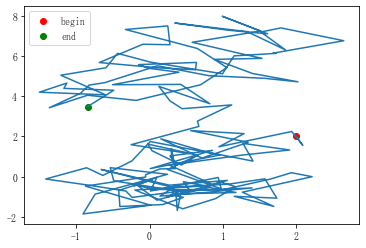

In [24]:
from maysics.models import SA
from matplotlib import pyplot as plt

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


sa = SA(random_state=100)
# 设定初始点为(2, 2)
# 设定初始温度为100，退火温度为20
sa.fit(select, 100, 20, [2, 2])

plt.plot(sa.trace[:, 0], sa.trace[:, 1])
plt.scatter(sa.trace[0,0], sa.trace[0,1], color='red', label='begin')
plt.scatter(sa.trace[-1,0], sa.trace[-1,1], color='green', label='end')
plt.legend()

### DEMO 11-3：旅行商（TSP）问题

In [25]:
from maysics.models import SA
import numpy as np

a = [[0, 1, 3, 3, 5, 2],
     [1, 0, 4, 2, 2, 3],
     [3, 4, 0, 2, 4, 7],
     [3, 2, 2, 0, 3, 6],
     [3, 2, 4, 3, 0, 9],
     [2, 3, 7, 6, 9, 0]]

def f(x):
    y = np.random.randint(1, len(x)-1, size=(2))
    x[y[0]], x[y[1]] = x[y[1]], x[y[0]]
    return x

def select(x):
    result = 0
    for i in range(len(x)-1):
        result += a[int(x[i])][int(x[i+1])]
    result += a[int(x[-1])][int(x[0])]
    return result

sa = SA(step=f, random_state=100)
sa.fit(select, 1000, 300, [0, 1, 2, 3, 4, 5])
print('最优路径：{}\n最优路径长度：{}'.format(sa.solution, sa.value))

最优路径：[0. 1. 3. 2. 4. 5.]
最优路径长度：20


在实际使用过程中，由于模拟退火有一定的随机算法，因此除非定义random_state，否则每次计算结果都可能不同
<br>可以使用fit函数中的loop参数来进行多次模拟退火，选取其中的最优解

### DEMO 11-4：用循环模拟退火求解旅行商（TSP）问题

In [26]:
from maysics.models import SA
import numpy as np

a = [[0, 1, 3, 3, 5, 2],
     [1, 0, 4, 2, 2, 3],
     [3, 4, 0, 2, 4, 7],
     [3, 2, 2, 0, 3, 6],
     [3, 2, 4, 3, 0, 9],
     [2, 3, 7, 6, 9, 0]]

def f(x):
    y = np.random.randint(1, len(x)-1, size=(2))
    x[y[0]], x[y[1]] = x[y[1]], x[y[0]]
    return x

def select(x):
    result = 0
    for i in range(len(x)-1):
        result += a[int(x[i])][int(x[i+1])]
    result += a[int(x[-1])][int(x[0])]
    return result

sa = SA(step=f, random_state=100)
sa.fit(select, 1000, 300, [0, 1, 2, 3, 4, 5], loop=100)
print('最优路径：{}\n最优路径长度：{}'.format(sa.solution, sa.value))

最优路径：[0. 1. 4. 3. 2. 5.]
最优路径长度：15


当select函数有其他参数时，可以使用fit函数的args参数来传递

<br></br>
## 梯度下降算法：GD
GD(ytol=0.01, acc=0.1, step=0.1, auto=False)
<br>```ytol```：浮点数类型，当函数值变化率小于ytol时停止迭代
<br>```acc```：浮点数类型，求导的精度
<br>```step```：浮点数类型，可选，步长倍率，每次生成的步长为step * 负梯度，若auto=True，则步长为x*10^step，其中x为梯度的第一位有效数字
<br>```auto```：布尔类型，可选，True表示采取自适应步长

### GD的方法
GD类下设可调用方法```fit```
<br>fit(select, initial, param={})
<br>```select```：函数类型，评估函数
<br>```initial```：数或数组，初始解，select函数的输入值
<br>```param```：字典类型，当select有其他非默认参数时，需输入以参数名为键，参数值为值的字典

### 功能说明
用法类似SA
<br>注意：默认最小值点为最优点
### DEMO 12-1：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值

In [27]:
from maysics.models import GD

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


gd = GD()
# 设定初始点为(10, 10)
gd.fit(select, [10, 10])

print('最小值点：{}\n最小值：{}'.format(gd.solution, gd.value))

最小值点：[1.08301035 1.08301035]
最小值：0.01378143586029789


### DEMO 12-2：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值求解轨迹

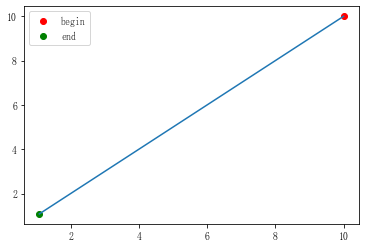

In [28]:
from maysics.models import GD
from matplotlib import pyplot as plt

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


gd = GD()
# 设定初始点为(10, 10)
# 设定初始温度为100，退火温度为20
gd.fit(select, [10, 10])

plt.plot(gd.trace[:, 0], gd.trace[:, 1])
plt.scatter(gd.trace[0,0], gd.trace[0,1], color='red', label='begin')
plt.scatter(gd.trace[-1,0], gd.trace[-1,1], color='green', label='end')
plt.legend()

当select函数有其他参数时，可以使用fit函数的param参数来传递